<a href="https://colab.research.google.com/github/brunacataldo/engenharia-de-dados/blob/master/Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas

In [ ]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 122 kB 5.1 MB/s 


In [ ]:
import pandas as pd
import pandera as pa
import numpy as np



## Extração da base de dados

Extração do Dataframe seguido da formatação do DateTime.

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/bc26-bruna/marketing_campaign.csv%20-%20marketing_campaign.csv.csv',parse_dates=['Dt_Customer'],dayfirst=True)

## Backup 

In [ ]:
dfback = df.copy

## Pré-análise

In [ ]:
#Visualização do dataframe
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
#Visualização dos tipos de dados
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [ ]:
#Verificando se há ausência de dados
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
#Setando o ID como como Index
df.set_index('ID',inplace=True)

## Tradução dos dados

Significado dos nomes das colunas em inglês: [Towards Data Science](https://towardsdatascience.com/data-science-project-marketing-analytics-data-driven-solutions-72d050084642)

In [ ]:
#Renomear as colunas
df.rename(columns={
    'Year_Birth': 'ano_nascimento',
    'Education': 'escolaridade',
    'Marital_Status': 'estado_civil',
    'Income': 'renda',
    'Kidhome': 'numero_criancas',
    'Teenhome': 'numero_adolescentes',
    'Dt_Customer': 'data_inscricao',
    'Recency': 'ultimo_pedido', 
    'MntWines': 'gasto_vinho',
    'MntFruits': 'gasto_frutas',
    'MntMeatProducts': 'gasto_carne',
    'MntFishProducts': 'gasto_peixe',
    'MntSweetProducts': 'gasto_doce',
    'MntGoldProds': 'gasto_gold',
    'NumDealsPurchases': 'pedidos_desconto',
    'NumWebPurchases': 'pedidos_site',
    'NumCatalogPurchases': 'pedidos_catalogo',
    'NumStorePurchases': 'pedidos_loja',
    'NumWebVisitsMonth': 'num_visitas_site',
    'AcceptedCmp3': 'aceito_campanha3',
    'AcceptedCmp4': 'aceito_campanha4',
    'AcceptedCmp5': 'aceito_campanha5',
    'AcceptedCmp1': 'aceito_campanha1',
    'AcceptedCmp2': 'aceito_campanha2',
    'Complain': 'reclamacoes',
    'Response': 'respostas', 
}, inplace=True)

In [ ]:
#Verificando diversidade de valores
pd.unique(df['escolaridade'])

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
#Renomeando valores
df.replace({
    'Graduation':'graduacao',
    'Master': 'mestrado',
    'Basic': 'grau basico',
    '2n Cycle': 'mestrado'
  },inplace=True)


In [ ]:
#Verificando diversidade de valores
pd.unique(df['estado_civil'])

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
#Renomeando valores
df.replace({
    'Single': 'solteiro',
    'Together': 'uniao estavel',
    'Married': 'casado',
    'Divorced': 'divorciado',
    'Widow': 'viuvo',
    'Alone': 'sozinho',
    'Absurd': 'so',
    'YOLO': 'curtindo adoidado'
  },inplace=True)

## Análise e tratamento de dados inconsistentes

In [ ]:
df.groupby(df['renda']).size()

renda
1730.0      1
2447.0      1
3502.0      1
4023.0      1
4428.0      1
           ..
157243.0    1
157733.0    1
160803.0    1
162397.0    1
666666.0    1
Length: 1974, dtype: int64

Por se tratar da renda anual, alguns valores são muito baixos e um dos salários é 666666.0.

In [ ]:
# Verificando ano de nascimento
df.groupby(df['ano_nascimento']).size()

ano_nascimento
1893     1
1899     1
1900     1
1940     1
1941     1
1943     7
1944     7
1945     8
1946    16
1947    16
1948    21
1949    30
1950    29
1951    43
1952    52
1953    35
1954    50
1955    49
1956    55
1957    43
1958    53
1959    51
1960    49
1961    36
1962    44
1963    45
1964    42
1965    74
1966    50
1967    44
1968    51
1969    71
1970    77
1971    87
1972    79
1973    74
1974    69
1975    83
1976    89
1977    52
1978    77
1979    53
1980    39
1981    39
1982    45
1983    42
1984    38
1985    32
1986    42
1987    27
1988    29
1989    30
1990    18
1991    15
1992    13
1993     5
1994     3
1995     5
1996     2
dtype: int64

Nesta coluna identifiquei os anos 1893, 1899 e 1900 mas optei manter para fins de visualização.

In [ ]:
#Verificando se os valores da coluna sao homogêneos
df['Z_CostContact'].unique()

array([3])

In [ ]:
#Verificando se os valores da coluna sao homogêneos
df['Z_Revenue'].unique()

array([11])

As colunas Z_CostContact e Z_Revenue são colunas homogêneas, portanto optei por tirá-las do Dataframe.

In [ ]:
#Dropagem das colunas que não serão utilizadas.
df.drop(['Z_CostContact', 'Z_Revenue'],axis=1,inplace=True)

In [ ]:
#Verificando a ausência de valores em renda.
filtronulo = df.renda.isna()
df.loc[filtronulo]

,ano_nascimento,escolaridade,estado_civil,renda,numero_criancas,numero_adolescentes,data_inscricao,ultimo_pedido,gasto_vinho,gasto_frutas,...,pedidos_catalogo,pedidos_loja,num_visitas_site,aceito_campanha3,aceito_campanha4,aceito_campanha5,aceito_campanha1,aceito_campanha2,reclamacoes,respostas
ID,,,,,,,,,,,,,,,,,,,,,
1994,1983,graduacao,casado,NaN,1,0,2013-11-15,11,5,5,...,0,2,7,0,0,0,0,0,0,0
5255,1986,graduacao,solteiro,NaN,1,0,2013-02-20,19,5,1,...,0,0,1,0,0,0,0,0,0,0
7281,1959,PhD,solteiro,NaN,0,0,2013-11-05,80,81,11,...,3,4,2,0,0,0,0,0,0,0
7244,1951,graduacao,solteiro,NaN,2,1,2014-01-01,96,48,5,...,1,4,6,0,0,0,0,0,0,0
8557,1982,graduacao,solteiro,NaN,1,0,2013-06-17,57,11,3,...,0,3,6,0,0,0,0,0,0,0
10629,1973,mestrado,casado,NaN,1,0,2012-09-14,25,25,3,...,0,3,8,0,0,0,0,0,0,0
8996,1957,PhD,casado,NaN,2,1,2012-11-19,4,230,42,...,2,8,9,0,0,0,0,0,0,0
9235,1957,graduacao,solteiro,NaN,1,1,2014-05-27,45,7,0,...,0,2,7,0,0,0,0,0,0,0
5798,1973,mestrado,uniao estavel,NaN,0,0,2013-11-23,87,445,37,...,4,8,1,0,0,0,0,0,0,0


In [ ]:
#Verificando se há dados repetidos no DF
ftyolo = df.estado_civil == 'curtindo adoidado'
df.loc[ftyolo]

,ano_nascimento,escolaridade,estado_civil,renda,numero_criancas,numero_adolescentes,data_inscricao,ultimo_pedido,gasto_vinho,gasto_frutas,...,pedidos_catalogo,pedidos_loja,num_visitas_site,aceito_campanha3,aceito_campanha4,aceito_campanha5,aceito_campanha1,aceito_campanha2,reclamacoes,respostas
ID,,,,,,,,,,,,,,,,,,,,,
492,1973,PhD,curtindo adoidado,48432.0,0,1,2012-10-18,3,322,3,...,1,6,8,0,0,0,0,0,0,0
11133,1973,PhD,curtindo adoidado,48432.0,0,1,2012-10-18,3,322,3,...,1,6,8,0,0,0,0,0,0,1


Como achei dois valores duplicados em ano de nascimento, escolaridade, renda e gastos, concluí que houve dois cadastros da mesma pessoa com IDs diferentes e optei por dropar o mais antigo.





In [ ]:
#Drop do cadastro mais antigo
df.drop([492],axis=0,inplace=True)

As colunas numero_criancas e numero_adolescentes podem ser concatenadas, já que ambas referem-se a menores de idade.
Vale lembrar, também, que o dataframe é dos EUA, portanto a maioridade civil é aos 21 anos.
OBS: Decidi concatenar mas deixar também as colunas originais para visualização. 

In [ ]:
#Concatenando colunas
df['dependentes'] = df['numero_criancas'] + df['numero_adolescentes']

In [ ]:
#Ordenando as colunas após as traduções e drops
df = df[['data_inscricao','ano_nascimento','escolaridade','estado_civil','renda','numero_criancas','numero_adolescentes','dependentes','ultimo_pedido','gasto_vinho','gasto_frutas','gasto_carne','gasto_peixe','gasto_doce','gasto_gold','pedidos_desconto','pedidos_catalogo','pedidos_loja','pedidos_site','num_visitas_site','aceito_campanha1','aceito_campanha2','aceito_campanha3','aceito_campanha4','aceito_campanha5','respostas','reclamacoes']]


## Validação de dados


O Pandera fornece uma API flexível e expressiva para executar a validação de dados em objetos do tipo dataframe para tornar os pipelines de processamento de dados mais legíveis e robustos. 

[Pandera Doc](https://pandera.readthedocs.io/en/stable/)

In [ ]:
# Criação do schema de validação dos dados

schema = pa.DataFrameSchema(
    columns = {
        'ID':pa.Column(pa.Int),
        'ano_nascimento':pa.Column(pa.Int),
        'escolaridade':pa.Column(pa.String),
        'estado_civil':pa.Column(pa.String),
        'renda':pa.Column(pa.Float,nullable=True),
        'numero_criancas':pa.Column(pa.Int),
        'numero_adolescentes':pa.Column(pa.Int),
        'data_inscricao':pa.Column(pa.DateTime),
        'ultimo_pedido': pa.Column(pa.Int),
        'quant_vinho':pa.Column(pa.Int),
        'quant_frutas':pa.Column(pa.Int),
        'gasto_carne':pa.Column(pa.Int),
        'gasto_peixe':pa.Column(pa.Int),
        'gasto_doce':pa.Column(pa.Int),
        'gasto_gold':pa.Column(pa.Int),
        'pedidos_desconto':pa.Column(pa.Int),
        'pedidos_site':pa.Column(pa.Int),
        'pedidos_catalogo':pa.Column(pa.Int),
        'pedidos_loja':pa.Column(pa.Int),
        'num_visitantes_site':pa.Column(pa.Int),
        'aceito_campanha3':pa.Column(pa.Int),
        'aceito_campanha4':pa.Column(pa.Int),
        'aceito_campanha5':pa.Column(pa.Int),
        'aceito_campanha1':pa.Column(pa.Int),
        'aceito_campanha2':pa.Column(pa.Int)

    }
)

## Análise de Dados usando gráficos

In [ ]:
#Representação gráfica dos menores de idade que compraram álcool

df['idade'] = 2014 - df['ano_nascimento']
ftmenor = df.idade < 21
ftvinho = df.gasto_vinho > 0
df2 = df.loc[ftmenor & ftvinho]
df2

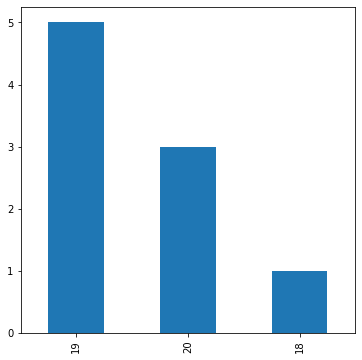

In [ ]:
df2.groupby(['idade'],dropna=False).size().sort_values(ascending=False).head(5).plot.bar(figsize=(6,6),xlabel='',ylabel='')

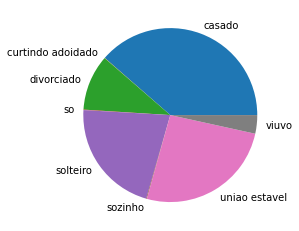

In [ ]:
#Visualização gráfica da coluna estado civil do dataframe
df.groupby(['estado_civil']).size().plot.pie(ylabel= '') 

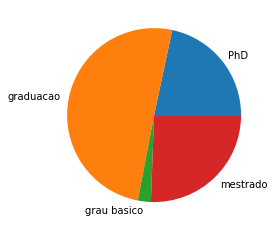

In [ ]:
#Visualização gráfica da coluna escolaridade do dataframe
df.groupby(['escolaridade']).size().plot.pie(ylabel= '') 